## Reddit Post Natural Language Processing and Classification
![reddit](../images/reddit_logo.png)
### 02. Exploratory Data Analysis (EDA)




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

In [2]:
reddit_file_1 = 'AskCulinary.csv'
reddit_file_2 = 'running.csv'

In [3]:
posts_1 = pd.read_csv(f'../data/{reddit_file_1}')
posts_2 = pd.read_csv(f'../data/{reddit_file_2}')

Concat second reddit posts dataframe to the first so we have one large dataframe containing two subreddit categories.

In [4]:
reddit_posts = pd.concat([posts_1, posts_2])


In [5]:
reddit_posts.shape

(20200, 6)

In [6]:
reddit_posts.tail()

,subreddit,selftext,title,author,created_utc,created_date
10095,running,Curious as to if there are any benefits or dow...,Splitting up long runs,AmbitiousRunner,1601422029,2020-09-29 23:27:09
10096,running,Hello runners! \n\nI don’t have much to add be...,Started running when gyms closed due to covid....,snapbanana,1601421860,2020-09-29 23:24:20
10097,running,[removed],How do I deal with this burnout/overtraining?,pikel27,1601421065,2020-09-29 23:11:05
10098,running,[removed],How do I deal with this burnout/overtraining?,pikel27,1601420910,2020-09-29 23:08:30
10099,running,[removed],When to increase time?,rosennolt,1601420875,2020-09-29 23:07:55


In [7]:
reddit_posts.isnull().sum()

subreddit         0
selftext        172
title             0
author            0
created_utc       0
created_date      0
dtype: int64

In [8]:
reddit_posts.dropna(inplace=True)
reddit_posts.reset_index(drop=True, inplace=True)

Combine selftext and title fields to build up word count.

In [9]:
reddit_posts['all_text'] = reddit_posts['selftext'] + ' ' + reddit_posts['title']

In [10]:
reddit_posts.iloc[0]['all_text']

"Hi everyone,\n\nI'm not sure if this is the place to go with this question, but I was wondering if someone could provide me some insight on what type of fridge I should be looking for for an instructional culinary kitchen. Size, features, etc...\n\n&amp;#x200B;\n\nI am a little out of my element as I've been tasked with finding the equipment for my park district's new kitchen but I really don't have any experience with teaching cooking or running an educational kitchen.\n\n&amp;#x200B;\n\nI appreciate any help. I understand if this question is not allowed and needs to be deleted. Fridge for an instructional kitchen?"

Delete all posts that have been removed. (The selftext field contains \[removed\])

In [11]:
#reddit_posts.sort_values(by='selftext')
indices_to_remove = reddit_posts[reddit_posts['selftext'].str.contains('\[removed\]')].index

reddit_posts.drop(indices_to_remove, inplace=True)
reddit_posts.reset_index(drop=True, inplace=True)

Delete all posts that have been deleted. (The selftext field contains \[deleted\])

In [12]:
#reddit_posts.sort_values(by='selftext')
deleted_to_remove = reddit_posts[reddit_posts['selftext'].str.contains('\[deleted\]')].index

reddit_posts.drop(deleted_to_remove, inplace=True)
reddit_posts.reset_index(drop=True, inplace=True)

#### Data cleaning:
 * Remove newline characters
 * Remove url's that might appear
 * Remove numeric data such as measurements in a cooking recipe.
 * Convert contractions such as I've to I have

In [13]:
reddit_posts['all_text'].replace('\n', ' ', regex=True, inplace=True)

# Regex example here:
#https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb
# \S captures all non-white space, + means greedy so goes until the end of a word.
reddit_posts['all_text'].replace('http\S+', ' ', regex=True, inplace=True)

# delete stray &amp; words
reddit_posts['all_text'].replace('&amp;', ' ', regex=True, inplace=True)

# delete #x200B; which is zero width space
reddit_posts['all_text'].replace('#x200B;', ' ', regex=True, inplace=True)

# delete measurements in a recipe. eg. 5.3oz, 1 1/4 cups
# This deletes all numbers, which may or may not include a period or a /, then have a letter or series of letters on the end
# as in 57g
reddit_posts['all_text'].replace('(\d+)[.|\/]?(\d+)?(\w+)?', ' ', regex=True, inplace=True)

# delete underscores, backslashes and forward slashes
reddit_posts['all_text'].replace('_|\\|\/', ' ', regex=True, inplace=True)

# to avoid getting a ton of 've' words after vectorizing, replace I've with I have
reddit_posts['all_text'].replace('[i|I][\’|\']ve', 'I have', regex=True, inplace=True)

# replace don't with do not
reddit_posts['all_text'].replace('[d|D]on[\’|\']t', 'do not', regex=True, inplace=True)

# replace aren't with are not
reddit_posts['all_text'].replace('[a|A]ren[\’|\']t', 'are not', regex=True, inplace=True)

# replace doesn't with does not
reddit_posts['all_text'].replace('[d|D]oesn[\’|\']t', 'does not', regex=True, inplace=True)


---
Delete posts with less than 30 characters in their all_text - they are normally garbage data or not worth keeping

In [14]:
reddit_posts[(reddit_posts['all_text'].str.len() < 30)].index

Int64Index([  561,   713,   714,  2049,  3471,  6023,  6612,  7617,  8469,
            10361, 11798, 11876, 14625, 15037, 15076, 15136, 16417, 17147,
            17151],
           dtype='int64')

In [15]:
reddit_posts.iloc[661]['all_text']

'I came across a post here recently and one the comments was about the dangers of botulism when defrosting vacuum sealed fish. So it got me thinking about defrosting other vacuum sealed meat/foods. I was fortunate to find a gently used chamber vacuum sealer on Craigslist for a ridiculously cheap price few years back. So pretty much seal everything from beef, pork, chicken, fish and other non protein items. For the record, I have always defrosted meat under cold water vacuum sealed bags including fish. Been doing it for years without knowing. I’m fairly knowledgeable when it comes to food safety and was really surprised when i read this. Even thought it was bullshit and ended up confirming it from a publication from Michigan State University. So it got me thinking about my defrosting process and cannot find any legit publications/articles if there is the same dangers of botulism with other foods. Does anyone know if the risk are present outside of seafood? For the time being, I have sta

In [16]:

short_text_posts = reddit_posts[(reddit_posts['all_text'].str.len() < 30)].index

reddit_posts.drop(short_text_posts, inplace=True)
reddit_posts.reset_index(drop=True, inplace=True)

Check for duplicates.  Not sure why but sometimes people submit the same post more than once. Perhaps they don't think it went through the first time?

In [17]:
reddit_posts.shape

(18105, 7)

In [18]:
reddit_posts['all_text'].nunique()

17847

So there are 17,847 unique selftext values, but 18,105 total rows, so there are duplicates that should be dropped.

In [19]:
reddit_posts.drop_duplicates(subset=['all_text'], inplace=True, ignore_index=True)
reddit_posts.shape

(17847, 7)

---
Create class column:
 * Subreddit 1 - AskCulinary
 * Subreddit 0 - running

In [20]:
reddit_posts['class'] = [1 if cat=='AskCulinary' else 0 for cat in reddit_posts['subreddit']]

In [21]:
reddit_posts.tail()

,subreddit,selftext,title,author,created_utc,created_date,all_text,class
17842,running,I am on week 4 of an 8 week half marathon plan...,"I started my training plan a week early, what ...",HoyAIAG,1601422568,2020-09-29 23:36:08,I am on week of an week half marathon plan...,0
17843,running,"Hi, \n\nI've started running again 3 months ag...","So... Rain jackets, yes or no? side question, ...",AugusteRenoi,1601422394,2020-09-29 23:33:14,"Hi, I have started running again months ag...",0
17844,running,How do you deal with exhaustion during menstru...,Extreme fatigue during menstruation,RotiRounderThanYours,1601422237,2020-09-29 23:30:37,How do you deal with exhaustion during menstru...,0
17845,running,Curious as to if there are any benefits or dow...,Splitting up long runs,AmbitiousRunner,1601422029,2020-09-29 23:27:09,Curious as to if there are any benefits or dow...,0
17846,running,Hello runners! \n\nI don’t have much to add be...,Started running when gyms closed due to covid....,snapbanana,1601421860,2020-09-29 23:24:20,Hello runners! I do not have much to add bec...,0


In [22]:
# add stop words that might be measurements for recipes, and distance for running (km)
# hat tip to for adding custom stop words : https://stackoverflow.com/a/24386751/732396

# the most common words in the running subreddit were, not surprisingly, run and running, so let's take
# those out
more_stop_words = ['oz', 'cups', 'km', 'run', 'running']
stop_words = text.ENGLISH_STOP_WORDS.union(more_stop_words)

Inspect the data using Count Vectorizer.  This will also be done in the modeling step

In [23]:
count_vec = CountVectorizer(stop_words = stop_words)
count_vec.fit(reddit_posts['all_text'])

CountVectorizer(stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}))

In [24]:
transformed_df = count_vec.transform(reddit_posts['all_text'])

In [25]:
transformed_df.shape

(17847, 29220)

Show the 20 most common words in the dataset.

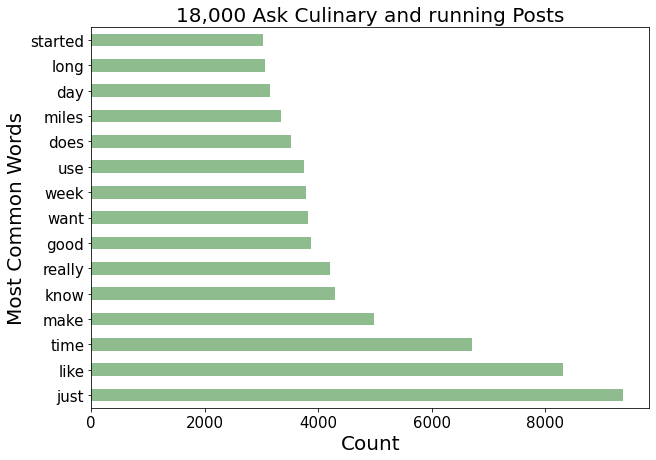

In [26]:
# Code borrowed from lesson 5.04
# convert training data to dataframe
words_df = pd.DataFrame(transformed_df.todense(), 
                          columns=count_vec.get_feature_names())

# plot top occuring words
ax = words_df.sum().sort_values(ascending=False).head(15).plot(kind='barh', figsize=(10,7), color='darkseagreen');
ax.set_title("18,000 Ask Culinary and running Posts",fontsize=20)
ax.set_xlabel("Count",fontsize=20)
ax.set_ylabel("Most Common Words",fontsize=20)
ax.tick_params(labelsize=15)

Based on above, we should add 'like' and 'just' to the list of stop words, since they don't add much value.

#### Export clean data

In [28]:
reddit_posts.to_csv('../data/clean_posts.csv', index=False)